### This script contains the following:

#### 1. Importing your libraries and data
#### 2. Subsetting, wrangling, and cleaning time-series data
#### 3. Time series analysis: decomposition
#### 4. Testing for stationarity
#### 5. Stationarizing the Federal Reserve Economic Data

### 1. Importing your libraries and data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [2]:
# Define path

path = r'C:\Users\shyro\OneDrive\Documents\2. Data Immersion\Achievement 6 - Advanced Analytics & Dashboard Design\King County House Sales'

In [3]:
# Import data

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'kc_house_data_revised_date.csv'))

In [4]:
df.shape

(21599, 24)

In [5]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [6]:
df.columns

Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year',
       'month'],
      dtype='object')

### 2. Subsetting, wrangling, and cleaning time-series data

In [7]:
df = df.groupby(by=['date']).count().reset_index()

In [8]:
df.head()

,date,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-05-02,67,67,67,67,67,67,67,67,67,...,67,67,67,67,67,67,67,67,67,67
1,2014-05-03,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
2,2014-05-04,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,2014-05-05,84,84,84,84,84,84,84,84,84,...,84,84,84,84,84,84,84,84,84,84
4,2014-05-06,83,83,83,83,83,83,83,83,83,...,83,83,83,83,83,83,83,83,83,83


In [9]:
# create a subset from the data

df2 = df.drop(['id','price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year',
       'month'], axis = 1)

In [10]:
df2.head()

,date,Unnamed: 0
0,2014-05-02,67
1,2014-05-03,4
2,2014-05-04,5
3,2014-05-05,84
4,2014-05-06,83


In [11]:
df2 = df2.rename(columns={'Unnamed: 0':'SaleCount'})

In [12]:
df2.head()

,date,SaleCount
0,2014-05-02,67
1,2014-05-03,4
2,2014-05-04,5
3,2014-05-05,84
4,2014-05-06,83


In [13]:
# Set the "date" column as the index

from datetime import datetime

df2['datetime'] = pd.to_datetime(df2['date']) # Create a datetime column from "Date.""
df2 = df2.set_index('datetime') # Set the datetime as the index of the dataframe.
df2.drop(['date'], axis=1, inplace=True) # Drop the "Date" column.
df2.head()

,SaleCount
datetime,
2014-05-02,67
2014-05-03,4
2014-05-04,5
2014-05-05,84
2014-05-06,83


In [14]:
df2.shape

(372, 1)

In [16]:
df2.sort_values(by='datetime', axis=0, inplace=True)

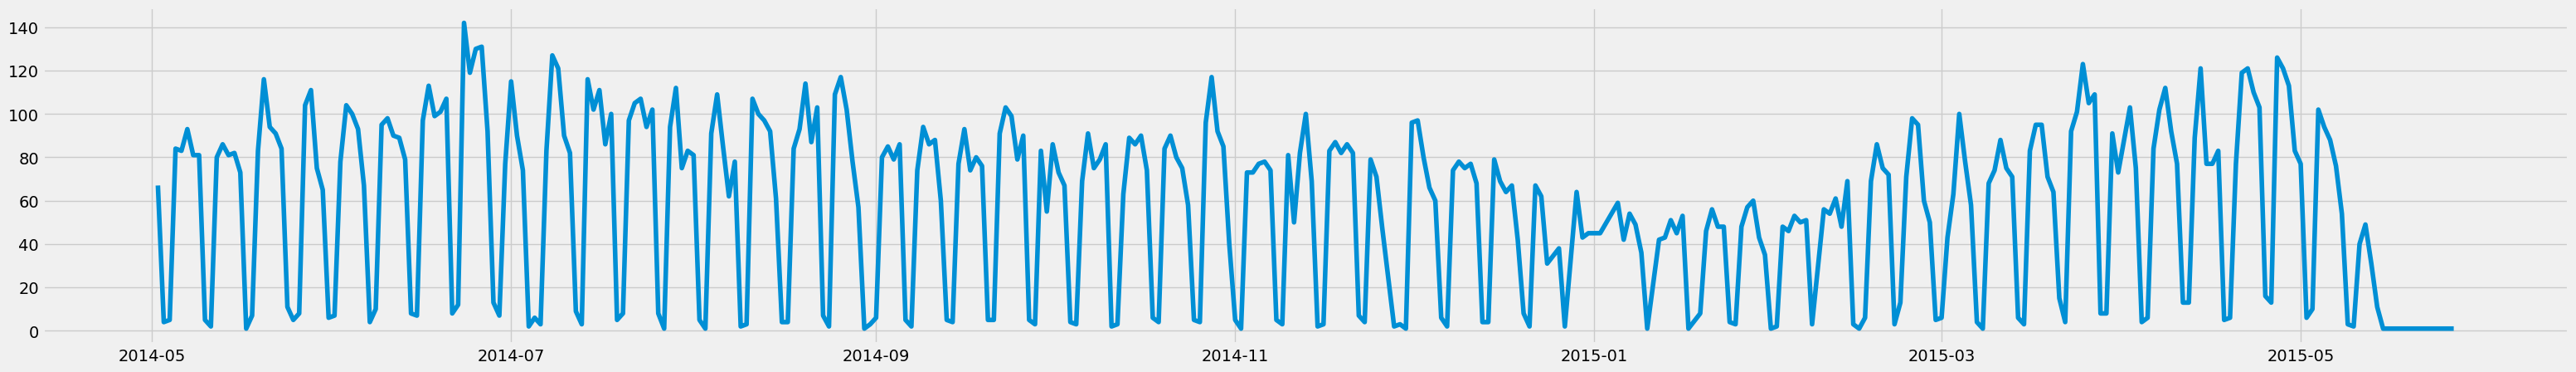

In [17]:
# Plot the new data set

plt.figure(figsize=(35,5), dpi=100)
plt.plot(df2)

In [18]:
# Check for missing values (you shouldn't have any)

df2.isnull().sum() 

SaleCount    0
dtype: int64

In [19]:
# Check for duplicates

dups = df2.duplicated()
dups.sum()


273

In [22]:
df2.shape

(372, 1)

In [23]:
print(dups)

datetime
2014-05-02    False
2014-05-03    False
2014-05-04    False
2014-05-05    False
2014-05-06    False
              ...  
2015-05-13     True
2015-05-14     True
2015-05-15     True
2015-05-24     True
2015-05-27     True
Length: 372, dtype: bool


In [24]:
df2.to_csv(os.path.join(path, '02 Data','Prepared Data', 'grouped.csv'))

#### I exported the data and while there are duplicate values in 'SalesCount', they do not share the same date. 

### 3. Time-series analysis: decomposition

In [27]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df2, model='additive', period=1)

In [28]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

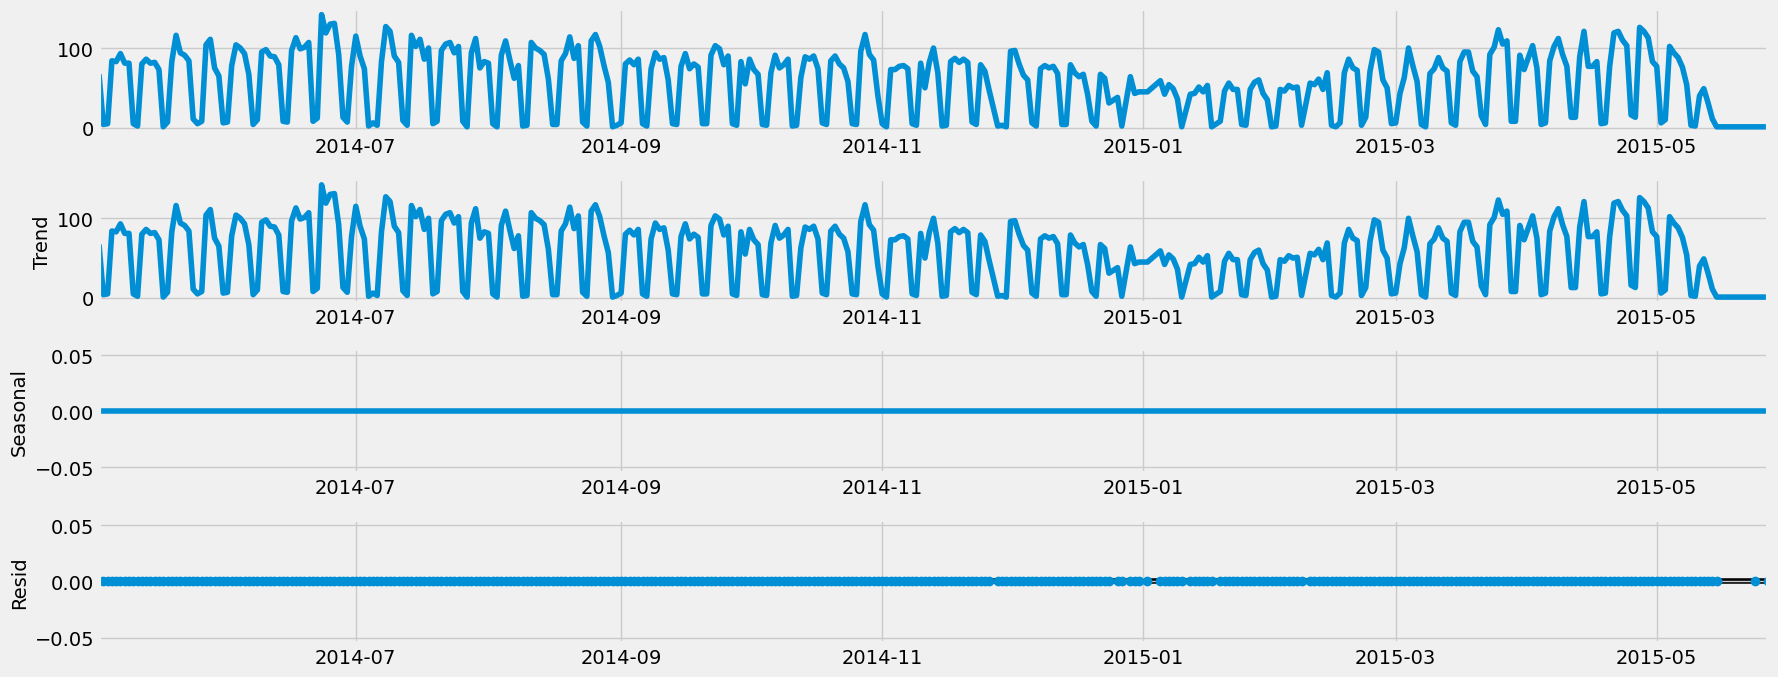

In [29]:
# Plot the separate components

decomposition.plot()
plt.show()

#### The first figure above is the data itselft, called the level.

#### The second is the underlying trend. Because the data doesn't have much noise, the level and trend are the same.

#### The third figure is the seasonality. Because the date does not have any seasonality, the line is flat. 

#### The last figure is called the residual. Because there are no unexplained noise, there are no residual after the trenad and seasonality have been extracted

### After conducting this test, it proves that the data is a stationary time series. 

### 4. Testing for stationarity

In [31]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df2['SaleCount'])

Dickey-Fuller Stationarity test:
Test Statistic                  -2.064241
p-value                          0.259134
Number of Lags Used             13.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64


#### Test Statistics= -2.064 is < critical values at 1%, 5%, and 10% level
#### p-value is > 0.05, which means the test result is insignificant.
#### Test statistic smaller than critical value = can reject null hypothesis
#### The data is stationary

### Disprove the null = no unit root = stationary data = can proceed with forecast


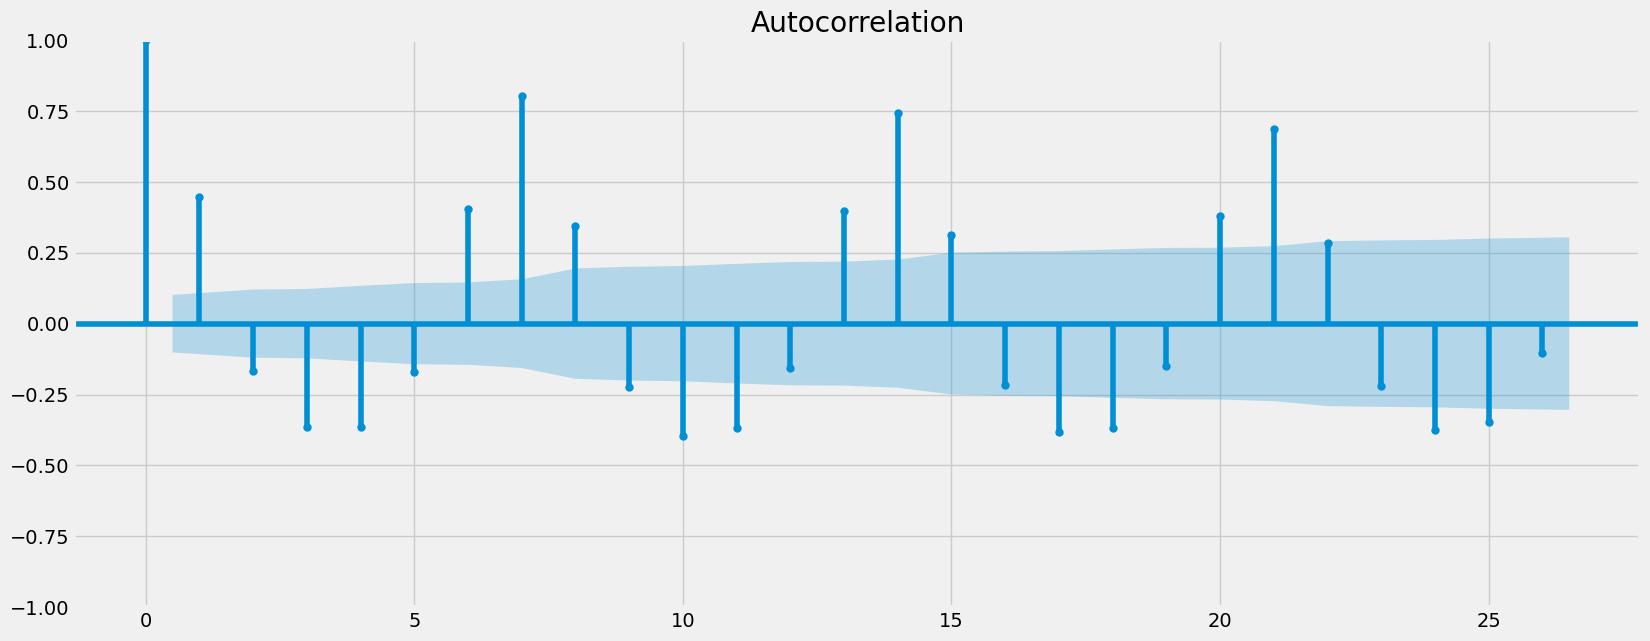

In [32]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df2)
plt.show()

The vertical lines represent the lags in the series, while the blue area represents the confidence interval. When lines go above the blue edge of the confidence interval, this means you have lags that are significantly correlated with each other. And when you have many lags beyond this interval, you can deduce that your data is non-stationary.

### 5. Stationarizing the King County House Sales Data

In [33]:
data_diff = df2 - df2.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [34]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [35]:
data_diff.head()

,SaleCount
datetime,
2014-05-03,-63.0
2014-05-04,1.0
2014-05-05,79.0
2014-05-06,-1.0
2014-05-07,10.0


In [36]:
data_diff.columns

Index(['SaleCount'], dtype='object')

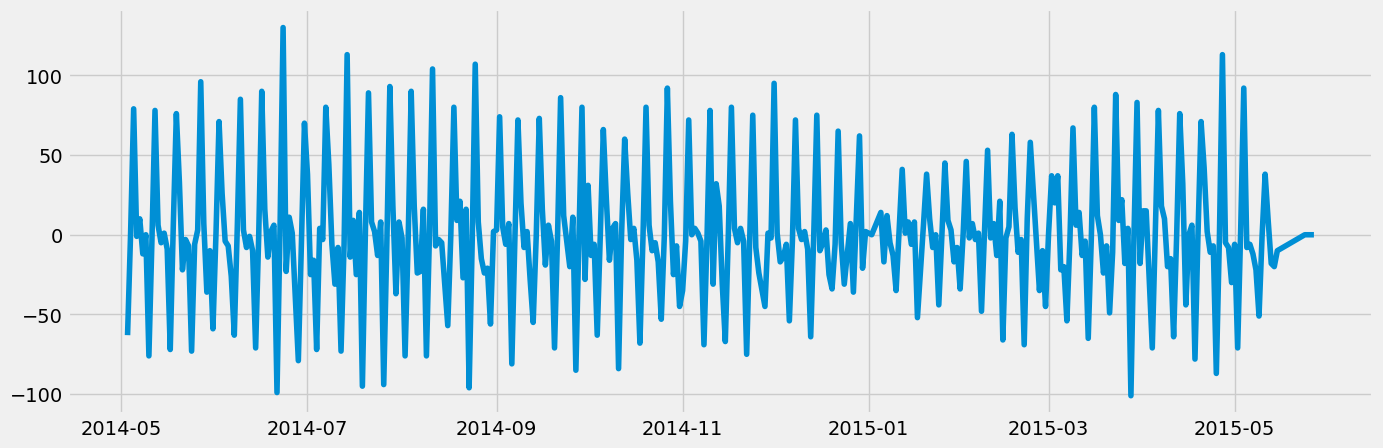

In [37]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [38]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -9.283118e+00
p-value                        1.235769e-15
Number of Lags Used            1.200000e+01
Number of Observations Used    3.580000e+02
Critical Value (1%)           -3.448749e+00
Critical Value (5%)           -2.869647e+00
Critical Value (10%)          -2.571089e+00
dtype: float64


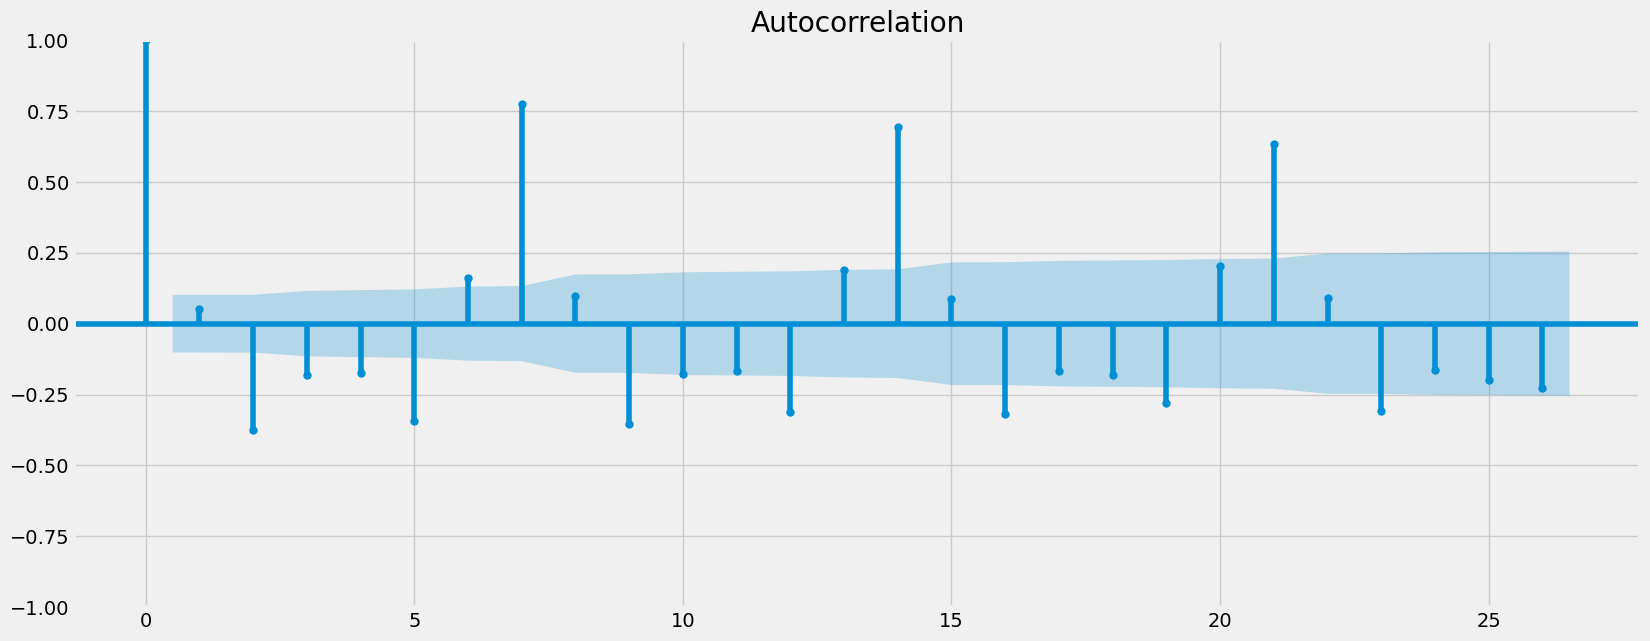

In [39]:
plot_acf(data_diff)
plt.show()

#### The p-value is satisfactory at less than 0.05. 

#### The autocorrelation plot also improved. There are now more data points inside the blue shade. Meaning the lags are now less correlated with each other. 